In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import corner
import json
import argparse
import os
import sys

In [2]:
chain_folder = "all_chains/chains_earth_4_Jun23/"
burn_frac = 0.1

In [3]:
if os.path.isfile(f"{chain_folder}/chain_1.txt"):
    chain_file = f"{chain_folder}/chain_1.txt"
elif os.path.isfile(f"{chain_folder}/chain_1.0.txt"):
    chain_file = f"{chain_folder}/chain_1.0.txt"
else:
    print("Could not find any chain file in the chain folder! Exiting!")

In [4]:
param_names = np.genfromtxt(f"{chain_folder}/params.txt", dtype=str)
psrlist = np.genfromtxt(f"{chain_folder}/psrlist.txt", dtype=str)
chain = np.loadtxt(chain_file)
print(f"Chain shape = {chain.shape}")

Chain shape = (89200, 101)


In [5]:
burn = int(chain.shape[0] * burn_frac)

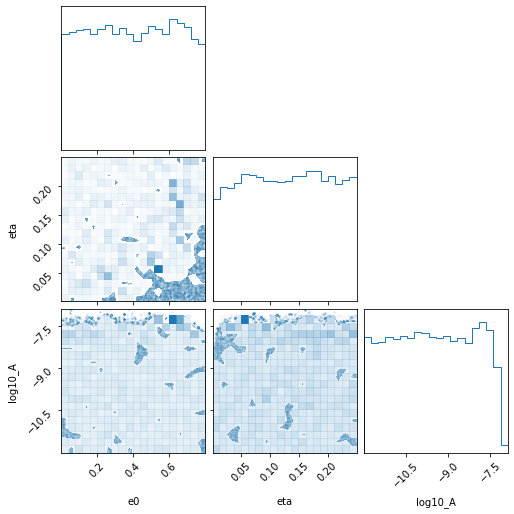

In [6]:
e_idx = np.where(param_names == "gwecc_e0")[0][0]
eta_idx = np.where(param_names == "gwecc_eta")[0][0]
A_idx = np.where(param_names == "gwecc_log10_A")[0][0]

corner.corner(chain[burn:, [e_idx, eta_idx, A_idx]], labels=["e0", "eta", "log10_A"],
                           color='C0', plot_contours=False, hist_kwargs={"density":True})
plt.show()

In [7]:
es = chain[burn:, e_idx]
etas = chain[burn:, eta_idx]
gwecc_log10_As = chain[burn:, A_idx]

In [8]:
ep, etap, logAp, valid = np.genfromtxt("valid_param_space.txt").transpose()

ev = ep[valid==1]
etav = etap[valid==1]
logAv = logAp[valid==1]

In [9]:
print(len(ev), len(etav), len(logAv))

168492 168492 168492


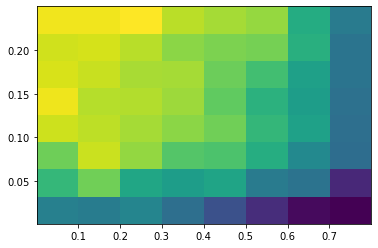

In [10]:
plt.hist2d(ev, etav, bins=8)
plt.show()

In [11]:
# Define the number of bins for the first two parameters
num_bins = 8

# Calculate the bin indices for the first two parameters
e_bins = np.linspace(0, 0.8, num_bins + 1)
eta_bins = np.linspace(0, 0.25, num_bins + 1)

In [12]:
# Digitize the first two parameters to obtain the bin indices
e_bin_indices = np.digitize(es, e_bins)
eta_bin_indices = np.digitize(etas, eta_bins)

In [13]:
ev_bin_indices = np.digitize(ev, e_bins)
etav_bin_indices = np.digitize(etav, eta_bins)

In [14]:
# Initialize an empty array to store the percentile values for each bin
percentiles = np.zeros((num_bins, num_bins))
valid_percentiles = np.zeros((num_bins, num_bins))

In [15]:
# Calculate the 95th percentile value for each bin
for i in range(num_bins):
    for j in range(num_bins):
        # Select the data points that fall within the current bin
        mask = (e_bin_indices == i + 1) & (eta_bin_indices == j + 1)
        # Calculate the 95th percentile of the third parameter for the current bin
        percentiles[i, j] = np.percentile(gwecc_log10_As[mask], 95)
        
        mask_valid = (ev_bin_indices == i + 1) & (etav_bin_indices == j + 1)
        valid_percentiles[i, j] = np.percentile(logAv[mask_valid], 95)
        
        plt.subplot(8, 8, 8*i+j+1)
        plt.hist(gwecc_log10_As[mask], density=True)
        plt.hist(logAv[mask_valid], density=True)
        plt.title

In [16]:
print(percentiles, valid_percentiles)

[[-7.63853105 -7.34883317 -7.72690922 -7.71560824 -7.74423075 -7.60787478
  -7.58524545 -7.58171405]
 [-7.55089787 -7.36767829 -7.44994924 -7.65962819 -7.63932377 -7.65151833
  -7.69665943 -7.60750687]
 [-7.39250401 -7.20928348 -7.52818856 -7.10791273 -7.42558918 -7.59744907
  -7.62905624 -7.66674256]
 [-7.53879249 -7.40893673 -7.26510905 -7.44948933 -7.55405055 -7.47582648
  -7.62346398 -7.52156876]
 [-7.6871534  -7.58332656 -7.18507215 -7.47564805 -7.45644776 -7.24710937
  -7.5278482  -7.64019221]
 [-8.1042383  -7.26312563 -7.26653609 -7.40989169 -7.35451464 -7.46778399
  -7.6600708  -7.40030782]
 [-8.29026899 -7.63190669 -7.45689591 -7.34555507 -7.31566832 -7.31513905
  -7.23047834 -7.30852994]
 [-8.57191143 -7.91623075 -7.79691272 -7.74684899 -7.59959778 -7.52395477
  -7.60486841 -7.7202034 ]] [[-7.58886988 -7.06185221 -6.88319787 -6.74953836 -6.68791044 -6.6409967
  -6.61021424 -6.52905633]
 [-7.56366393 -7.13929833 -6.93958076 -6.77350822 -6.70456972 -6.68571854
  -6.63699183 -6.

In [17]:
print(100*(percentiles - valid_percentiles)/valid_percentiles)

[[ 0.65439491  4.06381997 12.25754898 14.31312533 15.79447462 14.55923155
  14.75037228 16.1226626 ]
 [-0.16878137  3.19891321  7.35445706 13.08214212 13.9420438  14.44571423
  15.96608257 15.72557846]
 [-2.41525441 -0.0215796   7.98155167  3.40177479  9.09126283 13.28803361
  13.50108672 15.29907372]
 [-2.61256168  1.98692342  3.49505166  7.29004252 10.28020366  9.61857145
  12.46803097  9.96229163]
 [-2.07798728  2.93967021  0.56373261  6.18570026  6.54205315  4.5915275
   8.32163036 11.17593078]
 [ 1.32080717 -3.8604375  -0.68536722  2.99206688  3.32936133  5.0080209
   8.1525102   3.86627421]
 [ 0.74244293 -1.82598079 -0.89751097 -1.02037017 -0.63125984 -0.77260637
  -1.95174959 -0.09299193]
 [ 0.86328611 -1.52861446 -0.92637587 -0.308727   -1.43083904 -2.36121884
  -0.82552706  0.89719384]]


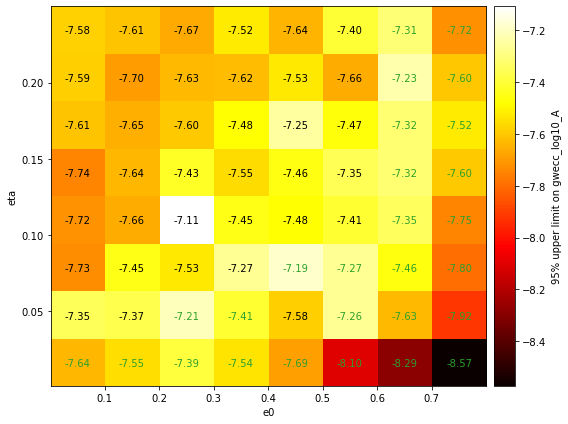

In [21]:
# Set the figure size and create the figure
fig = plt.figure(figsize=(8, 6))

# Create a colormap plot
ax = fig.add_subplot(111)
im = ax.imshow(percentiles.T, origin='lower', cmap='hot', aspect='auto', extent=[np.min(es), np.max(es), np.min(etas), np.max(etas)])
ax.set_xlabel('e0')
ax.set_ylabel('eta')
# ax.set_title('95% upper limit on gwecc_log10_A')

# Add text annotations to the colormap plot
for i in range(num_bins):
    for j in range(num_bins):
        value = percentiles[i, j]
        valid_value = valid_percentiles[i, j]
        if (value - valid_value)/valid_value > 0.02:
            ax.text((e_bins[i] + e_bins[i + 1]) / 2, (eta_bins[j] + eta_bins[j + 1]) / 2, f'{value:.2f}',
                    color='black', ha='center', va='center')
        else:
            ax.text((e_bins[i] + e_bins[i + 1]) / 2, (eta_bins[j] + eta_bins[j + 1]) / 2, f'{value:.2f}',
                    color='C2', ha='center', va='center')


# Create the colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('95% upper limit on gwecc_log10_A')

# Adjust subplot spacing
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

# Save the figure with desired size and aspect ratio
# plt.savefig('colormap_plot.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

In [ ]:
# # Create a colormap plot
# plt.figure(figsize=(8, 5))
# plt.imshow(percentiles.T, origin='lower', cmap='hot', aspect='auto', extent=[np.min(es), np.max(es), np.min(etas), np.max(etas)])
# plt.xlabel('First Parameter')
# plt.ylabel('Second Parameter')
# plt.title('95th Percentile of Third Parameter')
# plt.colorbar(label='Percentile')
# plt.show()